# **STAT6289**
### 03/25/2022
### Yi Nie

## **Introduction**

In this homework, we use the LSTM to predict stock price. 

## **Data pre-processing**

**Load the data and inspect them**

In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


**Split the data into training and test sets**

In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [5]:
print(training_set)

[[52.444   ]
 [52.450001]
 [52.419998]
 [53.348   ]
 [52.844002]
 [54.5     ]
 [55.      ]
 [54.009998]
 [52.254002]
 [53.93    ]
 [53.476002]
 [52.486   ]
 [51.150002]
 [52.854   ]
 [52.537998]
 [53.52    ]
 [53.257999]
 [52.001999]
 [52.716   ]
 [49.908001]
 [48.716   ]
 [47.630001]
 [47.43    ]
 [47.      ]
 [47.972   ]
 [49.448002]
 [51.112   ]
 [51.076   ]
 [52.066002]
 [50.411999]
 [47.200001]
 [40.557999]
 [46.104   ]
 [45.585999]
 [46.200001]
 [48.372002]
 [49.124001]
 [48.068001]
 [49.060001]
 [50.411999]
 [48.178001]
 [49.009998]
 [50.41    ]
 [49.445999]
 [49.528   ]
 [50.220001]
 [50.549999]
 [50.608002]
 [52.792   ]
 [51.591999]
 [52.796001]
 [51.806   ]
 [52.389999]
 [51.905998]
 [53.321999]
 [51.470001]
 [50.091999]
 [50.400002]
 [49.501999]
 [47.119999]
 [49.768002]
 [48.      ]
 [47.326   ]
 [46.015999]
 [44.186001]
 [44.598   ]
 [42.655998]
 [44.133999]
 [43.285999]
 [44.608002]
 [45.299999]
 [45.543999]
 [42.397999]
 [42.312   ]
 [43.      ]
 [42.276001]
 [42.967999]

**Normalize the data**

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## **Input features with time lag of 1 day**

### Reshape the data set

Reshape the train data

In [124]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
#values, #time-steps, #1 dimensional output

Reshape the test data

In [125]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


### Model with 4 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [126]:
model11 = Sequential()
model11.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model11.add(Dropout(0.2))
model11.add(LSTM(units = 50, return_sequences = True))
model11.add(Dropout(0.2))
model11.add(LSTM(units = 50, return_sequences = True))
model11.add(Dropout(0.2))
model11.add(LSTM(units = 50))
model11.add(Dropout(0.2))
model11.add(Dense(units = 1))

model11.compile(optimizer = 'adam', loss = 'mean_squared_error')

model11.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 66ms/step - loss: 0.0829
Epoch 2/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0190
Epoch 3/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0122
Epoch 4/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0118
Epoch 5/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0121
Epoch 6/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0127
Epoch 7/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0119
Epoch 8/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0115
Epoch 9/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0112
Epoch 10/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0101
Epoch 11/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0089
Epoch 12/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0101
Epoch 13/100
24/24 [=====

Predict the test data

In [127]:
predicted_stock_price_lag1_4 = model11.predict(X_test)
predicted_stock_price_lag1_4 = sc.inverse_transform(predicted_stock_price_lag1_4)

### Model with 6 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [128]:
model12 = Sequential()
model12.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model12.add(Dropout(0.2))
model12.add(LSTM(units = 50, return_sequences = True))
model12.add(Dropout(0.2))
model12.add(LSTM(units = 50, return_sequences = True))
model12.add(Dropout(0.2))
model12.add(LSTM(units = 50, return_sequences = True))
model12.add(Dropout(0.2))
model12.add(LSTM(units = 50, return_sequences = True))
model12.add(Dropout(0.2))
model12.add(LSTM(units = 50))
model12.add(Dropout(0.2))
model12.add(Dense(units = 1))

model12.compile(optimizer = 'adam', loss = 'mean_squared_error')

model12.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 92ms/step - loss: 0.0949
Epoch 2/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0245
Epoch 3/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0164
Epoch 4/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0165
Epoch 5/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0154
Epoch 6/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0155
Epoch 7/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0145
Epoch 8/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0135
Epoch 9/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0168
Epoch 10/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0156
Epoch 11/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0128
Epoch 12/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0119
Epoch 13/100
24/24 [=====

Pridict the test data

In [129]:
predicted_stock_price_lag1_6 = model12.predict(X_test)
predicted_stock_price_lag1_6 = sc.inverse_transform(predicted_stock_price_lag1_6)

### Model with 4 hidden layers, drop out rate = 10%, batch_size = 32

train the model

In [130]:
model13 = Sequential()
model13.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model13.add(Dropout(0.1))
model13.add(LSTM(units = 50, return_sequences = True))
model13.add(Dropout(0.1))
model13.add(LSTM(units = 50, return_sequences = True))
model13.add(Dropout(0.1))
model13.add(LSTM(units = 50))
model13.add(Dropout(0.1))
model13.add(Dense(units = 1))

model13.compile(optimizer = 'adam', loss = 'mean_squared_error')

model13.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 66ms/step - loss: 0.0775
Epoch 2/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0173
Epoch 3/100
24/24 [==============================] - 2s 62ms/step - loss: 0.0114
Epoch 4/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0107
Epoch 5/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0126
Epoch 6/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0097
Epoch 7/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0100
Epoch 8/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0096
Epoch 9/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0090
Epoch 10/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0087
Epoch 11/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0084
Epoch 12/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0080
Epoch 13/100
24/24 [=====

predic the test data

In [131]:
predicted_stock_price_lag1_4_drop = model13.predict(X_test)
predicted_stock_price_lag1_4_drop = sc.inverse_transform(predicted_stock_price_lag1_4_drop)

### Model with 4 hidden layers, drop out rate = 20%, batch_size = 84

train the model

In [132]:
model14 = Sequential()
model14.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model14.add(Dropout(0.2))
model14.add(LSTM(units = 50, return_sequences = True))
model14.add(Dropout(0.2))
model14.add(LSTM(units = 50, return_sequences = True))
model14.add(Dropout(0.2))
model14.add(LSTM(units = 50))
model14.add(Dropout(0.2))
model14.add(Dense(units = 1))

model14.compile(optimizer = 'adam', loss = 'mean_squared_error')

model14.fit(X_train, y_train, epochs = 100, batch_size = 84)

Epoch 1/100
9/9 [==============================] - 7s 116ms/step - loss: 0.0863
Epoch 2/100
9/9 [==============================] - 1s 109ms/step - loss: 0.0270
Epoch 3/100
9/9 [==============================] - 1s 100ms/step - loss: 0.0180
Epoch 4/100
9/9 [==============================] - 1s 119ms/step - loss: 0.0166
Epoch 5/100
9/9 [==============================] - 1s 119ms/step - loss: 0.0139
Epoch 6/100
9/9 [==============================] - 1s 124ms/step - loss: 0.0135
Epoch 7/100
9/9 [==============================] - 1s 116ms/step - loss: 0.0129
Epoch 8/100
9/9 [==============================] - 1s 113ms/step - loss: 0.0120
Epoch 9/100
9/9 [==============================] - 1s 127ms/step - loss: 0.0122
Epoch 10/100
9/9 [==============================] - 1s 110ms/step - loss: 0.0120
Epoch 11/100
9/9 [==============================] - 1s 123ms/step - loss: 0.0115
Epoch 12/100
9/9 [==============================] - 1s 117ms/step - loss: 0.0121
Epoch 13/100
9/9 [===================

predict the test data

In [133]:
predicted_stock_price_lag1_4_batch = model14.predict(X_test)
predicted_stock_price_lag1_4_batch = sc.inverse_transform(predicted_stock_price_lag1_4_batch)

### Comparison of Models

Visualize the predict results

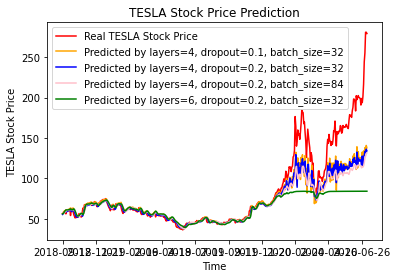

In [134]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4_drop, color = 'orange', label = 'Predicted by layers=4, dropout=0.1, batch_size=32')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4, color = 'blue', label = 'Predicted by layers=4, dropout=0.2, batch_size=32')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4_batch, color = 'pink', label = 'Predicted by layers=4, dropout=0.2, batch_size=84')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_6, color = 'green', label = 'Predicted by layers=6, dropout=0.2, batch_size=32')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Calculate the MSE

In [135]:
print('The MSE of model with layers=4, dropout=0.2, batch_size=32 is',((predicted_stock_price_lag1_4-dataset_test.values)**2).mean())
print('The MSE of model with layers=4, dropout=0.1, batch_size=32 is',((predicted_stock_price_lag1_4_drop-dataset_test.values)**2).mean())
print('The MSE of model with layers=4, dropout=0.2, batch_size=84 is',((predicted_stock_price_lag1_4_batch-dataset_test.values)**2).mean())
print('The MSE of model with layers=6, dropout=0.2, batch_size=32 is',((predicted_stock_price_lag1_6-dataset_test.values)**2).mean())

The MSE of model with layers=4, dropout=0.2, batch_size=32 is 764.9271326733065
The MSE of model with layers=4, dropout=0.1, batch_size=32 is 736.7377824621806
The MSE of model with layers=4, dropout=0.2, batch_size=84 is 925.4634768315738
The MSE of model with layers=6, dropout=0.2, batch_size=32 is 1708.3709443808718


## **Input features with time lag of 7 days**

### Reshape the data set

Reshape the train data

In [62]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(74, 800):
    X_train.append(training_set_scaled[i-67:i-7, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
#values, #time-steps, #1 dimensional output

Reshape the test data

In [64]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(67, 519):
    X_test.append(inputs[i-67:i-7, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(452, 60, 1)


### Model with 4 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [86]:
model71 = Sequential()
model71.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model71.add(Dropout(0.2))
model71.add(LSTM(units = 50, return_sequences = True))
model71.add(Dropout(0.2))
model71.add(LSTM(units = 50, return_sequences = True))
model71.add(Dropout(0.2))
model71.add(LSTM(units = 50))
model71.add(Dropout(0.2))
model71.add(Dense(units = 1))

model71.compile(optimizer = 'adam', loss = 'mean_squared_error')

model71.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 9s 66ms/step - loss: 0.0884
Epoch 2/100
23/23 [==============================] - 2s 68ms/step - loss: 0.0198
Epoch 3/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0173
Epoch 4/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0162
Epoch 5/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0158
Epoch 6/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0187
Epoch 7/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0154
Epoch 8/100
23/23 [==============================] - 1s 66ms/step - loss: 0.0148
Epoch 9/100
23/23 [==============================] - 2s 70ms/step - loss: 0.0148
Epoch 10/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0145
Epoch 11/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0145
Epoch 12/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0152
Epoch 13/100
23/23 [=====

Predict the test data

In [87]:
predicted_stock_price_lag7_4 = model71.predict(X_test)
predicted_stock_price_lag7_4 = sc.inverse_transform(predicted_stock_price_lag7_4)

### Model with 6 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [101]:
model72 = Sequential()
model72.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model72.add(Dropout(0.2))
model72.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model72.add(Dropout(0.2))
model72.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model72.add(Dropout(0.2))
model72.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model72.add(Dropout(0.2))
model72.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model72.add(Dropout(0.2))
model72.add(LSTM(units = 50))
model72.add(Dropout(0.2))
model72.add(Dense(units = 1))

model72.compile(optimizer = 'adam', loss = 'mean_squared_error')

model72.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 13s 99ms/step - loss: 0.0831
Epoch 2/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0262
Epoch 3/100
23/23 [==============================] - 2s 91ms/step - loss: 0.0205
Epoch 4/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0201
Epoch 5/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0197
Epoch 6/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0192
Epoch 7/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0181
Epoch 8/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0205
Epoch 9/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0184
Epoch 10/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0164
Epoch 11/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0177
Epoch 12/100
23/23 [==============================] - 2s 96ms/step - loss: 0.0168
Epoch 13/100
23/23 [====

Predict the test data

In [102]:
predicted_stock_price_lag7_6 = model72.predict(X_test)
predicted_stock_price_lag7_6 = sc.inverse_transform(predicted_stock_price_lag7_6)

### Model with 4 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [103]:
model73 = Sequential()
model73.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model73.add(Dropout(0.2))
model73.add(LSTM(units = 50, return_sequences = True))
model73.add(Dropout(0.2))
model73.add(LSTM(units = 50, return_sequences = True))
model73.add(Dropout(0.2))
model73.add(LSTM(units = 50))
model73.add(Dropout(0.2))
model73.add(Dense(units = 1))

model73.compile(optimizer = 'adam', loss = 'mean_squared_error')

model73.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 8s 64ms/step - loss: 0.0777
Epoch 2/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0221
Epoch 3/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0171
Epoch 4/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0158
Epoch 5/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0155
Epoch 6/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0161
Epoch 7/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0154
Epoch 8/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0156
Epoch 9/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0147
Epoch 10/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0155
Epoch 11/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0148
Epoch 12/100
23/23 [==============================] - 2s 65ms/step - loss: 0.0147
Epoch 13/100
23/23 [=====

Predict the test data

In [104]:
predicted_stock_price_lag7_4_drop = model73.predict(X_test)
predicted_stock_price_lag7_4_drop = sc.inverse_transform(predicted_stock_price_lag7_4_drop)

### Model with 4 hidden layers, drop out rate = 20%, batch_size = 84

Train the model

In [100]:
model74 = Sequential()
model74.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model74.add(Dropout(0.2))
model74.add(LSTM(units = 50, return_sequences = True))
model74.add(Dropout(0.2))
model74.add(LSTM(units = 50, return_sequences = True))
model74.add(Dropout(0.2))
model74.add(LSTM(units = 50))
model74.add(Dropout(0.2))
model74.add(Dense(units = 1))

model74.compile(optimizer = 'adam', loss = 'mean_squared_error')

model74.fit(X_train, y_train, epochs = 100, batch_size = 84)

Epoch 1/100
9/9 [==============================] - 8s 108ms/step - loss: 0.1411
Epoch 2/100
9/9 [==============================] - 1s 101ms/step - loss: 0.0329
Epoch 3/100
9/9 [==============================] - 1s 113ms/step - loss: 0.0247
Epoch 4/100
9/9 [==============================] - 1s 106ms/step - loss: 0.0218
Epoch 5/100
9/9 [==============================] - 1s 101ms/step - loss: 0.0169
Epoch 6/100
9/9 [==============================] - 1s 101ms/step - loss: 0.0168
Epoch 7/100
9/9 [==============================] - 1s 98ms/step - loss: 0.0156
Epoch 8/100
9/9 [==============================] - 1s 102ms/step - loss: 0.0153
Epoch 9/100
9/9 [==============================] - 1s 107ms/step - loss: 0.0161
Epoch 10/100
9/9 [==============================] - 1s 98ms/step - loss: 0.0159
Epoch 11/100
9/9 [==============================] - 1s 102ms/step - loss: 0.0160
Epoch 12/100
9/9 [==============================] - 1s 103ms/step - loss: 0.0160
Epoch 13/100
9/9 [=====================

Predict the test data

In [105]:
predicted_stock_price_lag7_4_batch = model74.predict(X_test)
predicted_stock_price_lag7_4_batch = sc.inverse_transform(predicted_stock_price_lag7_4_batch)

### Comparison of Models

Visualize the predict results

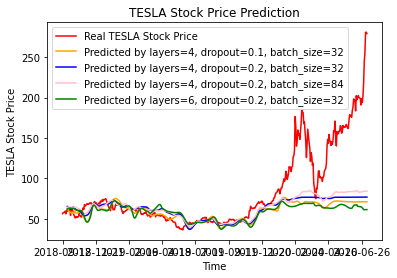

In [109]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4_drop, color = 'orange', label = 'Predicted by layers=4, dropout=0.1, batch_size=32')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4, color = 'blue', label = 'Predicted by layers=4, dropout=0.2, batch_size=32')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4_batch, color = 'pink', label = 'Predicted by layers=4, dropout=0.2, batch_size=84')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_6, color = 'green', label = 'Predicted by layers=6, dropout=0.2, batch_size=32')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **Input features with time lag of 14 days**

### Reshape the data set

Reshape the train data

In [111]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(88, 800):
    X_train.append(training_set_scaled[i-74:i-14, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(712, 60, 1)
#values, #time-steps, #1 dimensional output

Reshape the test data

In [112]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(74, 519):
    X_test.append(inputs[i-74:i-14, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(445, 60, 1)


### Model with 4 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [113]:
model141 = Sequential()
model141.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model141.add(Dropout(0.2))
model141.add(LSTM(units = 50, return_sequences = True))
model141.add(Dropout(0.2))
model141.add(LSTM(units = 50, return_sequences = True))
model141.add(Dropout(0.2))
model141.add(LSTM(units = 50))
model141.add(Dropout(0.2))
model141.add(Dense(units = 1))

model141.compile(optimizer = 'adam', loss = 'mean_squared_error')

model141.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 7s 69ms/step - loss: 0.0739
Epoch 2/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0233
Epoch 3/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0201
Epoch 4/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0228
Epoch 5/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0180
Epoch 6/100
23/23 [==============================] - 2s 67ms/step - loss: 0.0189
Epoch 7/100
23/23 [==============================] - 2s 70ms/step - loss: 0.0194
Epoch 8/100
23/23 [==============================] - 2s 69ms/step - loss: 0.0193
Epoch 9/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0181
Epoch 10/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0170
Epoch 11/100
23/23 [==============================] - 2s 68ms/step - loss: 0.0176
Epoch 12/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0170
Epoch 13/100
23/23 [=====

Predict the test data

In [114]:
predicted_stock_price_lag14_4 = model141.predict(X_test)
predicted_stock_price_lag14_4 = sc.inverse_transform(predicted_stock_price_lag14_4)

### Model with 6 hidden layers, drop out rate = 20%, batch_size = 32

Train the model

In [115]:
model142 = Sequential()
model142.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model142.add(Dropout(0.2))
model142.add(LSTM(units = 50, return_sequences = True))
model142.add(Dropout(0.2))
model142.add(LSTM(units = 50, return_sequences = True))
model142.add(Dropout(0.2))
model142.add(LSTM(units = 50, return_sequences = True))
model142.add(Dropout(0.2))
model142.add(LSTM(units = 50, return_sequences = True))
model142.add(Dropout(0.2))
model142.add(LSTM(units = 50))
model142.add(Dropout(0.2))
model142.add(Dense(units = 1))

model142.compile(optimizer = 'adam', loss = 'mean_squared_error')

model142.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 9s 94ms/step - loss: 0.0943
Epoch 2/100
23/23 [==============================] - 2s 90ms/step - loss: 0.0276
Epoch 3/100
23/23 [==============================] - 2s 91ms/step - loss: 0.0225
Epoch 4/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0221
Epoch 5/100
23/23 [==============================] - 2s 91ms/step - loss: 0.0225
Epoch 6/100
23/23 [==============================] - 2s 90ms/step - loss: 0.0210
Epoch 7/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0193
Epoch 8/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0219
Epoch 9/100
23/23 [==============================] - 2s 91ms/step - loss: 0.0190
Epoch 10/100
23/23 [==============================] - 2s 105ms/step - loss: 0.0204
Epoch 11/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0211
Epoch 12/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0186
Epoch 13/100
23/23 [====

Predict the test data

In [116]:
predicted_stock_price_lag14_6 = model142.predict(X_test)
predicted_stock_price_lag14_6 = sc.inverse_transform(predicted_stock_price_lag14_6)

### Model with 4 hidden layers, drop out rate = 10%, batch_size = 32

Train the model

In [117]:
model143 = Sequential()
model143.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model143.add(Dropout(0.1))
model143.add(LSTM(units = 50, return_sequences = True))
model143.add(Dropout(0.1))
model143.add(LSTM(units = 50, return_sequences = True))
model143.add(Dropout(0.1))
model143.add(LSTM(units = 50))
model143.add(Dropout(0.1))
model143.add(Dense(units = 1))
143
model143.compile(optimizer = 'adam', loss = 'mean_squared_error')
143
model143.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 6s 67ms/step - loss: 0.0628
Epoch 2/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0238
Epoch 3/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0207
Epoch 4/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0197
Epoch 5/100
23/23 [==============================] - 1s 58ms/step - loss: 0.0183
Epoch 6/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0170
Epoch 7/100
23/23 [==============================] - 1s 58ms/step - loss: 0.0180
Epoch 8/100
23/23 [==============================] - 2s 67ms/step - loss: 0.0172
Epoch 9/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0175
Epoch 10/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0181
Epoch 11/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0168
Epoch 12/100
23/23 [==============================] - 1s 60ms/step - loss: 0.0169
Epoch 13/100
23/23 [=====

Predict the test data

In [118]:
predicted_stock_price_lag14_4_drop = model143.predict(X_test)
predicted_stock_price_lag14_4_drop = sc.inverse_transform(predicted_stock_price_lag14_4_drop)

### Model with 4 hidden layers, drop out rate = 20%, batch_size = 84

Train the model

In [119]:
model144 = Sequential()
model144.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model144.add(Dropout(0.2))
model144.add(LSTM(units = 50, return_sequences = True))
model144.add(Dropout(0.2))
model144.add(LSTM(units = 50, return_sequences = True))
model144.add(Dropout(0.2))
model144.add(LSTM(units = 50))
model144.add(Dropout(0.2))
model144.add(Dense(units = 2))

model144.compile(optimizer = 'adam', loss = 'mean_squared_error')

model144.fit(X_train, y_train, epochs = 100, batch_size = 84)

Epoch 1/100
9/9 [==============================] - 6s 120ms/step - loss: 0.1688
Epoch 2/100
9/9 [==============================] - 1s 114ms/step - loss: 0.0420
Epoch 3/100
9/9 [==============================] - 1s 109ms/step - loss: 0.0317
Epoch 4/100
9/9 [==============================] - 1s 117ms/step - loss: 0.0250
Epoch 5/100
9/9 [==============================] - 1s 115ms/step - loss: 0.0223
Epoch 6/100
9/9 [==============================] - 1s 115ms/step - loss: 0.0209
Epoch 7/100
9/9 [==============================] - 1s 107ms/step - loss: 0.0197
Epoch 8/100
9/9 [==============================] - 1s 111ms/step - loss: 0.0202
Epoch 9/100
9/9 [==============================] - 1s 100ms/step - loss: 0.0208
Epoch 10/100
9/9 [==============================] - 1s 103ms/step - loss: 0.0195
Epoch 11/100
9/9 [==============================] - 1s 99ms/step - loss: 0.0202
Epoch 12/100
9/9 [==============================] - 1s 114ms/step - loss: 0.0207
Epoch 13/100
9/9 [====================

Predict the test data

In [120]:
predicted_stock_price_lag14_4_batch = model144.predict(X_test)
predicted_stock_price_lag14_4_batch = sc.inverse_transform(predicted_stock_price_lag14_4_batch)

### Comparison of Models

Visualize the predict results

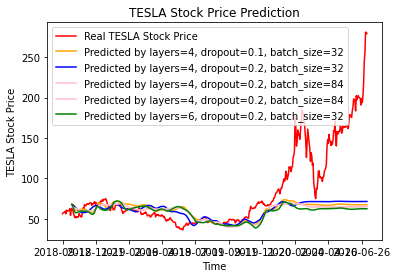

In [121]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4_drop, color = 'orange', label = 'Predicted by layers=4, dropout=0.1, batch_size=32')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4, color = 'blue', label = 'Predicted by layers=4, dropout=0.2, batch_size=32')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4_batch, color = 'pink', label = 'Predicted by layers=4, dropout=0.2, batch_size=84')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_6, color = 'green', label = 'Predicted by layers=6, dropout=0.2, batch_size=32')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Comparison of all models above

### Visulazition of results

Compare models with different lag, hidden layers = 4, dropout = 0.2, batch size = 32

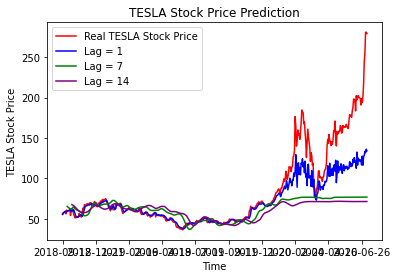

In [140]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4, color = 'blue', label = 'Lag = 1')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4, color = 'green', label = 'Lag = 7')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4, color = 'purple', label = 'Lag = 14')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Compare models with different lag, hidden layers = 4, dropout = 0.1, batch size = 32

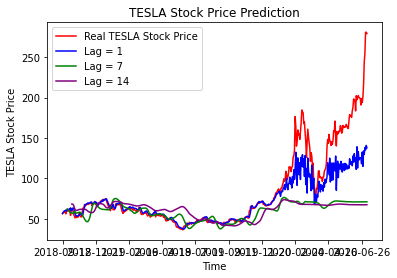

In [141]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4_drop, color = 'blue', label = 'Lag = 1')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4_drop, color = 'green', label = 'Lag = 7')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4_drop, color = 'purple', label = 'Lag = 14')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Compare models with different lag, hidden layers = 4, dropout = 0.2, batch size = 84

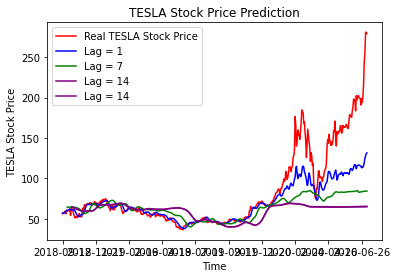

In [142]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_4_batch, color = 'blue', label = 'Lag = 1')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_4_batch, color = 'green', label = 'Lag = 7')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_4_batch, color = 'purple', label = 'Lag = 14')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Compare models with different lag, hidden layers = 6, dropout = 0.2, batch size = 32

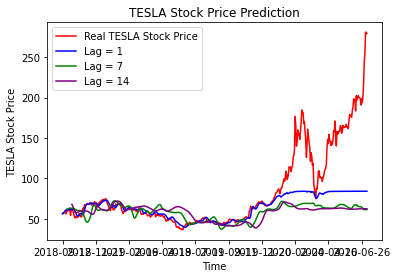

In [147]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_lag1_6, color = 'blue', label = 'Lag = 1')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_lag7_6, color = 'green', label = 'Lag = 7')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_lag14_6, color = 'purple', label = 'Lag = 14')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Prediction Utill Oct. 2020

In [148]:
test = dataset_test.values
train = sc.fit_transform(test)

Prediction by model with hidden layers = 4, dropout = 20%, batchsize = 32, lag=14

In [157]:
for k in range(6):
    newdata=[]
    for i in range(14):
        newdata.append(train[len(train)-14-60+i+1:len(train)-14+i+1])
    newdata=np.array(newdata)
    newdata = np.reshape(newdata, (newdata.shape[0], newdata.shape[1], 1))
    
    future_result=model141.predict(newdata)
    train=np.append(train,future_result)
    
prediction141 = sc.inverse_transform(train[-84:].reshape(84,1).tolist())    

Prediction by model with hidden layers = 4, dropout = 20%, batchsize = 32, lag=7

In [161]:
for k in range(12):
    newdata=[]
    for i in range(7):
        newdata.append(train[len(train)-7-60+i+1:len(train)-7+i+1])
    newdata=np.array(newdata)
    newdata = np.reshape(newdata, (newdata.shape[0], newdata.shape[1], 1))
    
    future_result=model71.predict(newdata)
    train=np.append(train,future_result)
    
prediction71 = sc.inverse_transform(train[-84:].reshape(84,1).tolist())    

Prediction by model with hidden layers = 4, dropout = 20%, batchsize = 32, lag=7

In [164]:
for k in range(84):
    newdata=[]
    for i in range(1):
        newdata.append(train[len(train)-60+i:len(train)+i])
    newdata=np.array(newdata)
    newdata = np.reshape(newdata, (newdata.shape[0], newdata.shape[1], 1))
    
    future_result=model11.predict(newdata)
    train=np.append(train,future_result)
    
prediction11 = sc.inverse_transform(train[-84:].reshape(84,1).tolist())    

Visualization

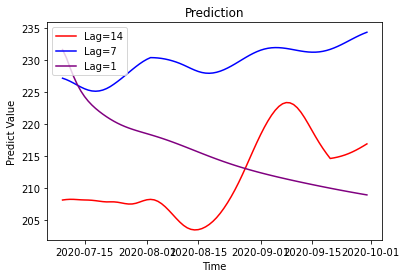

In [166]:
date=pd.date_range(start='07/09/2020', periods=84)
plt.plot(date, prediction141, color = 'red', label = 'Lag=14')
plt.plot(date, prediction71, color = 'blue', label = 'Lag=7')
plt.plot(date, prediction11, color = 'purple', label = 'Lag=1')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Predict Value')
plt.legend()
plt.plot()
plt.show()